# SMS Spam Detection

Import Modules

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset into a Pandas DataFrame

In [17]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Exploratory Data Analysis

In [11]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df["length"] = df["message"].apply(len)
df

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


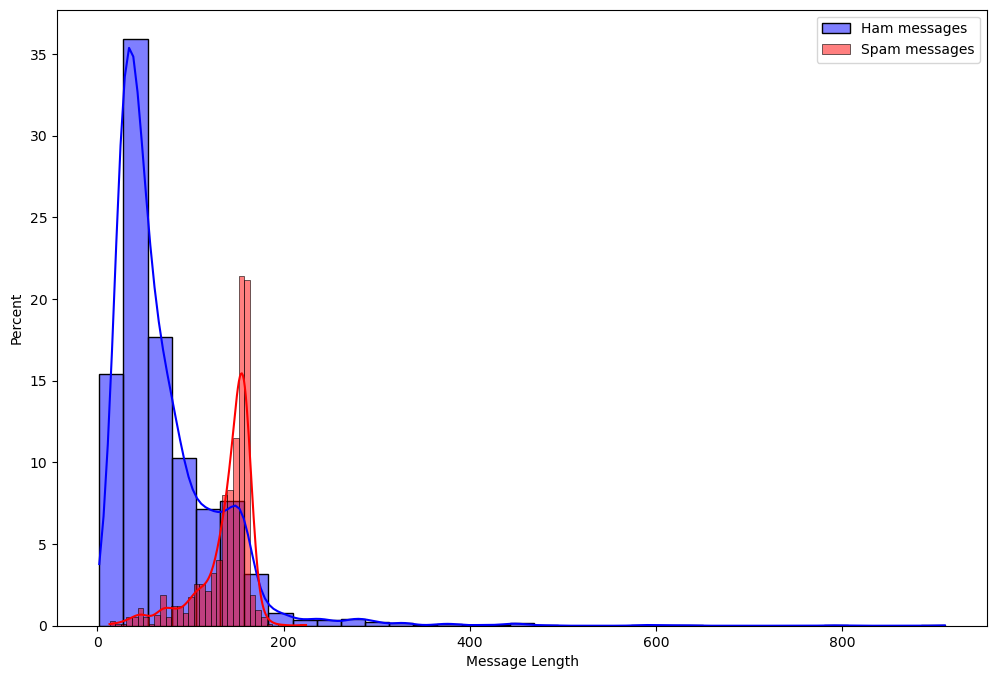

In [44]:
plt.figure(figsize=(12, 8))

# Filter data for label=0 (Ham messages)
ham_data = df[df["label"] == 0]
sns.histplot(ham_data["length"], bins=35, color='blue', label='Ham messages', kde=True, common_norm=False, stat="percent")

# Filter data for label=1 (Spam messages)
spam_data = df[df["label"] == 1]
sns.histplot(spam_data["length"], bins=35, color='red', label='Spam messages', kde=True, common_norm=False, stat="percent")

plt.legend()
plt.xlabel("Message Length")
plt.show()


In [6]:
df[df["label"] == 1]

,label,message
2,1,free entry wkly comp win fa cup final tkts 21s...
5,1,freemsg hey darling 3 weeks word back id like ...
8,1,winner valued network customer selected receiv...
9,1,mobile 11 months r entitled update latest colo...
11,1,six chances win cash 100 20000 pounds txt csh1...
...,...,...
5537,1,want explicit sex 30 secs ring 02073162414 cos...
5540,1,asked 3mobile 0870 chatlines inclu free mins i...
5547,1,contract mobile 11 mnths latest motorola nokia...
5566,1,reminder o2 get 250 pounds free call credit de...


In [5]:
def process_text(message):
    message = "".join([char for char in message if char not in string.punctuation]).lower()
    STOPWORDS  = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    return ' '.join([word for word in message.split() if word not in STOPWORDS])
df["message"] = df["message"].apply(process_text)
df

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif oni
2,1,free entry wkly comp win fa cup final tkts 21s...
3,0,dun say early hor c already say
4,0,nah think goes usf lives around though
...,...,...
5567,1,2nd time tried contact å£750 pound prize claim...
5568,0,ì b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...
